In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import optuna


In [17]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [18]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [19]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [21]:
train_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [22]:
#Checking NaN proportion 

na_sum = train_df.isna().sum()
proportion = na_sum/len(train_df)
proportion[proportion>0]


HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
dtype: float64

In [23]:
# Substituting nan values for training set

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']] = \
    imp.fit_transform(train_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']])

imp = SimpleImputer(missing_values=np.nan, strategy='median')
train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
    imp.fit_transform(train_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

train_df = train_df.drop('Name', axis=1)

# Substituting nan values for testing set

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']] = \
    imp.fit_transform(test_df[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']])

imp = SimpleImputer(missing_values=np.nan, strategy='median')
test_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = \
    imp.fit_transform(test_df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

test_df = test_df.drop('Name', axis=1)


In [24]:
train_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [25]:
train_df['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [26]:
train_df['CryoSleep'].value_counts()

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [27]:
train_df['Cabin'].value_counts()

G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64

In [28]:
train_df['Destination'].value_counts()

TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [29]:
train_df['Transported'].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

In [30]:
#Data manipulation on train and test set. Some variables like cabin can be used to extract more information as stated in the Kaggle

train_df[['group', 'group_num']]= train_df['PassengerId'].str.split('_', expand=True)
train_df[['deck', 'num', 'side']] = train_df['Cabin'].str.split('/', expand=True)

#Transform labels with label encoding

labelencoder = LabelEncoder()

train_df_final = train_df.copy() #Creating a new df so we can use the initial one for EDA

train_df_final[['VIP', 'Transported', 'CryoSleep', 'side']] = train_df_final[['VIP', 'Transported', 'CryoSleep', 'side']]\
    .apply(labelencoder.fit_transform)
train_df_final = pd.get_dummies(train_df_final, columns=['HomePlanet', 'Destination', 'deck'])

train_df_final = train_df_final.drop(['PassengerId', 'Cabin', 'num','group', 'group_num'], axis = 1)

# Repeat for test set 

test_df[['group', 'group_num']]= test_df['PassengerId'].str.split('_', expand=True)
test_df[['deck', 'num', 'side']] = test_df['Cabin'].str.split('/', expand=True)

#Transform labels with label encoding

test_df_final = test_df.copy() 

test_df_final[['VIP', 'CryoSleep', 'side']] = test_df_final[['VIP', 'CryoSleep', 'side']]\
    .apply(labelencoder.fit_transform)
test_df_final = pd.get_dummies(test_df_final, columns=['HomePlanet', 'Destination', 'deck'])

test_df_final = test_df_final.drop(['PassengerId', 'Cabin', 'num', 'group', 'group_num'], axis = 1)

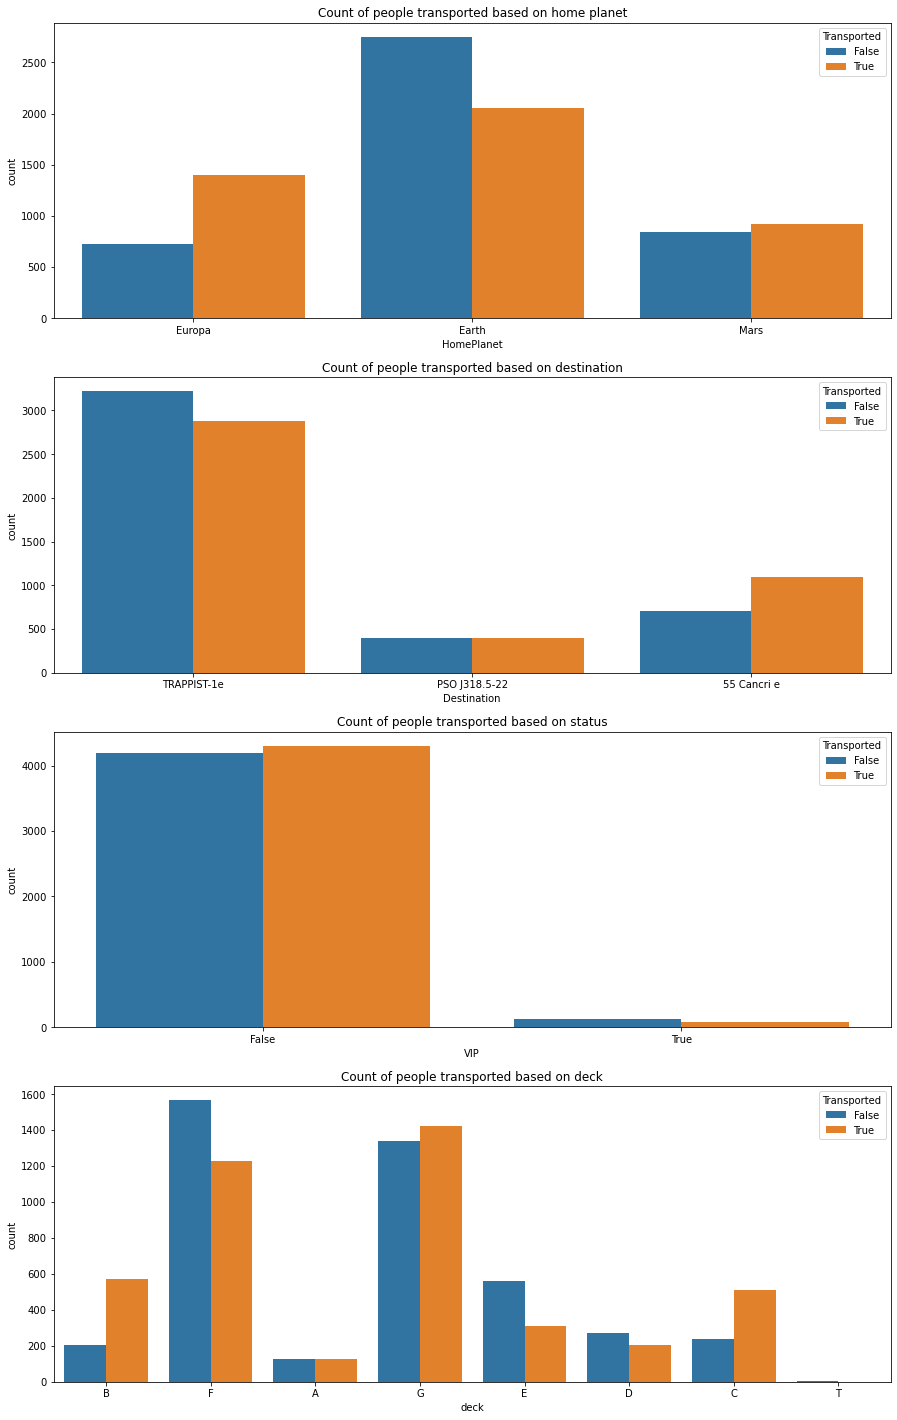

In [31]:
fig, ax = plt.subplots(nrows=4, figsize=(15,25))

sns.countplot(data = train_df, x='HomePlanet', hue= 'Transported', ax = ax[0])
ax[0].set_title('Count of people transported based on home planet')

sns.countplot(data = train_df, x='Destination', hue= 'Transported', ax = ax[1])
ax[1].set_title('Count of people transported based on destination')

sns.countplot(data = train_df, x='VIP', hue= 'Transported', ax = ax[2])
ax[2].set_title('Count of people transported based on status')

sns.countplot(data = train_df, x='deck', hue= 'Transported', ax = ax[3])
ax[3].set_title('Count of people transported based on deck')


plt.show()

In [32]:
fig = px.histogram(train_df, x="Age",  color="Transported",
                   hover_data=train_df.columns,\
                    title = 'Distribution of age for transported/not transported passengers')
fig.show()

<AxesSubplot:>

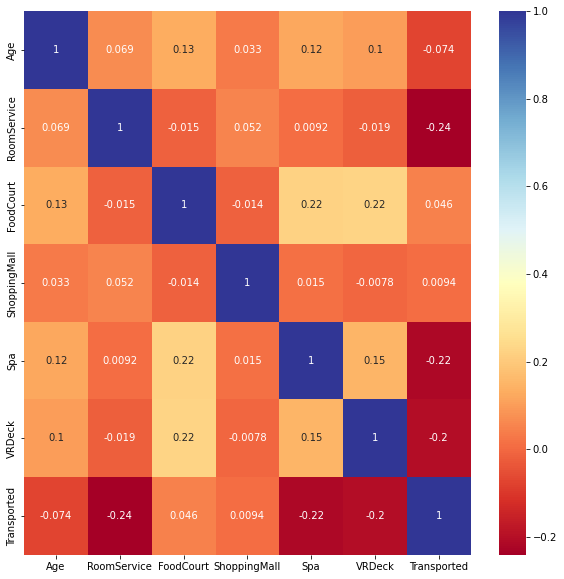

In [33]:
cols = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'group', 'group_num', 'deck', 'num', 'side', 'Transported']

train_df = train_df.reindex(columns= cols)

corr = train_df.corr()

plt.figure(figsize= (10, 10))
sns.heatmap(corr, annot= True, cmap = 'RdYlBu')

In [34]:
X = train_df_final.drop('Transported', axis = 1)
y = train_df_final['Transported']

In [35]:
def objective(trial):
      n_estimators = trial.suggest_int('n_estimators', 2, 20)
      max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))
      clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
      return cross_val_score(clf, X, y, 
           n_jobs=-1, cv=3).mean()



In [36]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2022-06-22 00:45:59,218] A new study created in memory with name: no-name-762c729b-54ab-499d-b740-1546b37be23d
[I 2022-06-22 00:46:01,518] Trial 0 finished with value: 0.7860356878231441 and parameters: {'n_estimators': 8, 'max_depth': 8.6030874832447}. Best is trial 0 with value: 0.7860356878231441.
[I 2022-06-22 00:46:01,833] Trial 1 finished with value: 0.7410577357298852 and parameters: {'n_estimators': 14, 'max_depth': 2.0294522277349896}. Best is trial 0 with value: 0.7860356878231441.
[I 2022-06-22 00:46:01,890] Trial 2 finished with value: 0.7846553858695354 and parameters: {'n_estimators': 12, 'max_depth': 16.62668269523225}. Best is trial 0 with value: 0.7860356878231441.
[I 2022-06-22 00:46:02,216] Trial 3 finished with value: 0.780283880447468 and parameters: {'n_estimators': 12, 'max_depth': 19.27571063679734}. Best is trial 0 with value: 0.7860356878231441.
[I 2022-06-22 00:46:02,500] Trial 4 finished with value: 0.7392173860634488 and parameters: {'n_estimators': 18, 

In [37]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.79627402247504
Best hyperparameters: {'n_estimators': 19, 'max_depth': 9.709270192680735}


In [38]:
clf = RandomForestClassifier(n_estimators = trial.params['n_estimators'], max_depth= trial.params['max_depth'])
clf.fit(X, y)
pred = clf.predict(test_df_final)

In [39]:
prediction = pd.read_csv('sample_submission.csv')

In [40]:
prediction['Transported'] = pred
prediction['Transported'] = prediction['Transported'].apply(lambda x: True if x == 1 else False)
prediction = prediction.set_index('PassengerId')
prediction.to_csv('prediction.csv')

In [41]:
prediction

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy import argmax
from numpy import unique


n_features = X.shape[1]
n_class = len(unique(y))

model = Sequential()
model.add(Dense(20, input_dim=n_features, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(n_class, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

model.fit(X, y, epochs=150, batch_size=32, verbose=2)

pred = model.predict(test_df_final) #metti df prediction
pred = argmax(pred, axis=-1).astype('int')

Epoch 1/150


2022-06-22 00:47:09.110002: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-22 00:47:09.305949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


272/272 - 3s - loss: 17.3731 - 3s/epoch - 12ms/step
Epoch 2/150
272/272 - 1s - loss: 3.7603 - 886ms/epoch - 3ms/step
Epoch 3/150
272/272 - 1s - loss: 2.3966 - 878ms/epoch - 3ms/step
Epoch 4/150
272/272 - 1s - loss: 1.7770 - 867ms/epoch - 3ms/step
Epoch 5/150
272/272 - 1s - loss: 1.4326 - 873ms/epoch - 3ms/step
Epoch 6/150
272/272 - 1s - loss: 1.2074 - 869ms/epoch - 3ms/step
Epoch 7/150
272/272 - 1s - loss: 1.1602 - 901ms/epoch - 3ms/step
Epoch 8/150
272/272 - 1s - loss: 1.1085 - 851ms/epoch - 3ms/step
Epoch 9/150
272/272 - 1s - loss: 1.0512 - 841ms/epoch - 3ms/step
Epoch 10/150
272/272 - 1s - loss: 0.8556 - 865ms/epoch - 3ms/step
Epoch 11/150
272/272 - 1s - loss: 0.9130 - 858ms/epoch - 3ms/step
Epoch 12/150
272/272 - 1s - loss: 0.8634 - 898ms/epoch - 3ms/step
Epoch 13/150
272/272 - 1s - loss: 0.8941 - 883ms/epoch - 3ms/step
Epoch 14/150
272/272 - 1s - loss: 0.8256 - 850ms/epoch - 3ms/step
Epoch 15/150
272/272 - 1s - loss: 0.7353 - 848ms/epoch - 3ms/step
Epoch 16/150
272/272 - 1s - loss

2022-06-22 00:49:22.349923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


134/134 [==============================] - 0s 1ms/step


In [44]:
pred

array([1, 0, 1, ..., 1, 1, 1])

In [45]:
prediction = pd.read_csv('sample_submission.csv')

prediction['Transported'] = pred
prediction['Transported'] = prediction['Transported'].apply(lambda x: True if x == 1 else False)
prediction = prediction.set_index('PassengerId')
prediction.to_csv('prediction_nn.csv')